babaiekomeil@gmail.com 09175920350

##Teaching a Variational Autoencoder (VAE) to draw MNIST characters

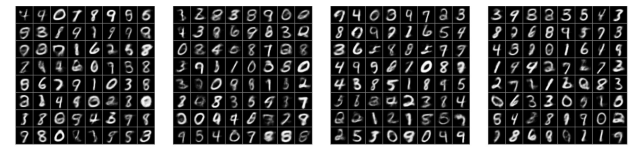

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models,layers
from keras import applications
import glob2 as glob
from numpy import random

In [2]:
# dimensionality of the latents space 
embedding_dim = 32 

#Input layer
input_img = layers.Input(shape=(784,))  

#Encoding layer
encoded = layers.Dense(embedding_dim, activation='relu')(input_img)

#Decoding layer
decoded = layers.Dense(784,activation='sigmoid')(encoded) 

#Autoencoder --> in this API Model, we define the Input tensor and the output layer
#wraps the 2 layers of Encoder e Decoder
autoencoder = models.Model(input_img,decoded)
autoencoder.summary()

#Encoder
encoder = models.Model(input_img,encoded)
encoder.summary()

#Decoder
encoded_input = layers.Input(shape=(embedding_dim,))
decoder_layers = autoencoder.layers[-1]  #applying the last layer
decoder = models.Model(encoded_input,decoder_layers(encoded_input))

print(input_img)
print(encoded)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32) 

In [3]:
from tensorflow import keras
opt = keras.optimizers.Adam()
opt1 = keras.optimizers.SGD(lr=0.001)

In [4]:
#autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.compile(optimizer=opt,loss='binary_crossentropy')


In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()  #underscore for unanimous label that we don't
                                    # want to keep im memory
#Normalization

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train = x_train.reshape((-1,784))  #to go from (60000,28,28) to new shape and -1 let
                                    #numpy to calculate the number for you
x_test = x_test.reshape((-1,784))

print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [6]:
history = autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2759 - val_loss: 0.1886
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1704 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1449 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1293 - val_loss: 0.1224
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1191 - val_loss: 0.1145
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1122 - val_loss: 0.1084
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1072 - val_loss: 0.1040
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1033 - val_loss: 0.1005
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1004 - val_loss: 0.0980
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0982 - val_loss: 0.0961

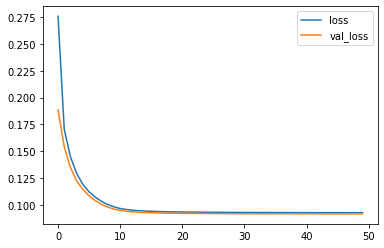

In [7]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.close()

## Validation tell us how good is the model in generalizing


(10000, 32) (10000, 784)


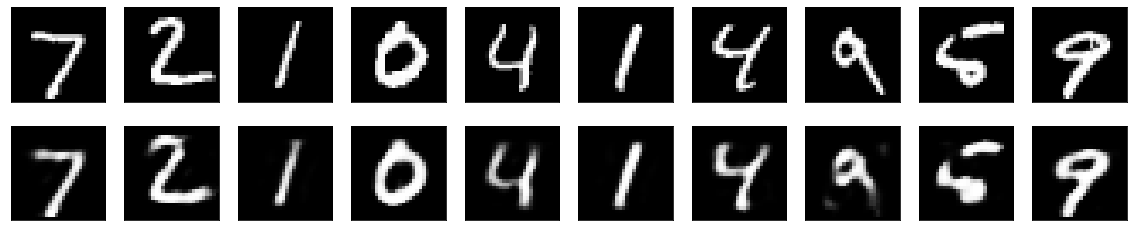

In [8]:
encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs)  
print(encoded_imgs.shape,decoded_imgs.shape)

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.close()

https://towardsdatascience.com/how-to-generate-new-data-in-machine-learning-with-vae-variational-autoencoder-applied-to-mnist-ca68591acdcf